<a href="https://colab.research.google.com/github/Nitesh-code-droid/ECO_life/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00


In [2]:
!pip install keras_facenet


  Preparing metadata (setup.py) ... done
  Created wheel for keras_facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=b34809461a796da88a73bb3582c8c1a74fb0de5704e2a8c815a6a473a7a7a7bd
  Stored in directory: /root/.cache/pip/wheels/05/b0/f5/19ac49fedc10b1df3ee56b096edbcfa39d45794fccc6bcdbbf
Successfully built keras_facenet


In [12]:
    !pip install scikit-image

In [5]:
from mtcnn import MTCNN #pretrained model to detect faces in images
from keras_facenet import FaceNet #to generate feature vectors for face verification
import cv2 #Opencv helps with image processing
import numpy as np #to handle image data and numerical operations on arrays
import torch #to speed up processing
import matplotlib.pyplot as plt #for data visualisation
from scipy.spatial.distance import cosine #to calculate cosine distance between two vector points
from skimage import io #for loading images from local urls
import warnings #for cleaner output
warnings. filterwarnings('ignore') #ignore irrelevant warnings
plt.style.use('dark_background') #to apply a dark theme for plots

In [152]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving 3.jpeg to 3 (4).jpeg
Saving mathew perry down side.jpg to mathew perry down side (1).jpg
Saving mathew.jpg to mathew (2).jpg
Saving mathewridingcycle.jpg to mathewridingcycle (1).jpg
User uploaded file "3 (4).jpeg" with length 2369 bytes
User uploaded file "mathew perry down side (1).jpg" with length 70680 bytes
User uploaded file "mathew (2).jpg" with length 426244 bytes
User uploaded file "mathewridingcycle (1).jpg" with length 125966 bytes


In [153]:
#Images

# Use the keys from the 'uploaded' dictionary which contain the filenames of the uploaded images
image_list = list(uploaded.keys())

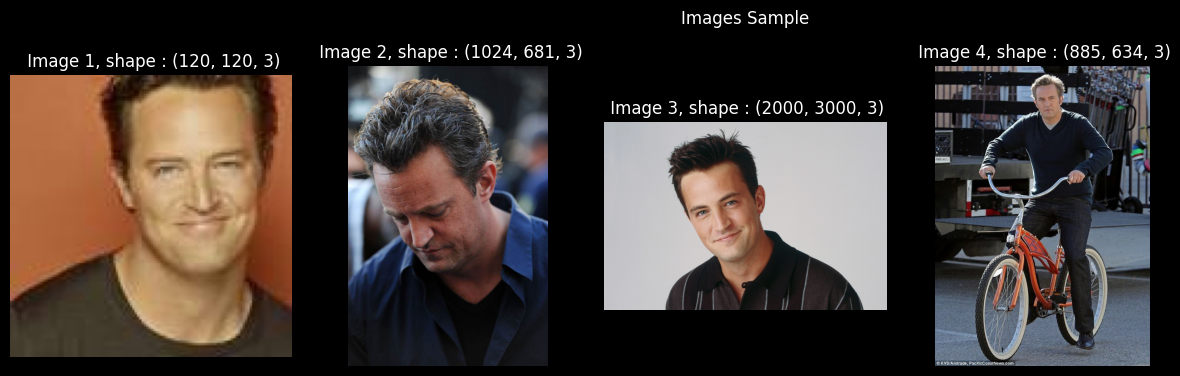

In [154]:
plt.figure(figsize=[15,7]) #for big image size
# Use image_list which contains the paths of uploaded files
for i in range(len(image_list)): # Iterate up to the length of image_list
  plt.subplot(2, 5, i+1) #to create a 2 row and 5 column table
  plt.suptitle('Images Sample')

  image_path = image_list[i]

  if image_path and os.path.exists(image_path): # Check if the image path is valid and the file exists
    try:
        img = plt.imread(image_path)
        plt.imshow(img) #to display
        plt.axis('off') #to show image dimensions and number
        plt.title(f" Image {i+1}, shape : {img.shape}")
    except Exception as e:
        print(f"Error reading or displaying image {image_path}: {e}")
        plt.title(f" Image {i+1}\n(Error loading)")
        plt.axis('off')
  else:
    plt.title(f" Image {i+1}\n(File not found)")
    plt.axis('off')


plt.tight_layout() # Adjust layout to prevent titles overlapping
plt.show() # Ensure the plot is displayed

In [141]:
class Color:
  GREEN = '\033[92m'
  BLUE = '\033[94m'
  RED = '\033[91m'
  BOLD = '\033[1m'
  END = '\033[0m'

In [155]:
def Face_Detection(image=None, model = MTCNN(), color='red', url=None, size=10):
  print(f'{Color.BOLD}The process has been started for detection of faces...')

  plt.style.use('dark_background')

  if url:
    img = io.imread(url)

  if image:
    img = plt.imread(image)

  # Ensure the image has 3 channels (for grayscale images, convert to RGB)
  if len(img.shape) == 2:
      img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  elif img.shape[2] == 4:
      # If the image has an alpha channel, convert to RGB
      img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)


  model = model
  coordinates = model.detect_faces(img) #finds faces and returns their locations

  plt.style.use('dark_background')

  plt.figure(figsize=(12, 6))

  plt.subplot(1,2,1)
  plt.imshow(img)

  plt.title('Face Detection')
  plt.axis('off')
  ax = plt.gca()

  for coordinate in coordinates:
    print('{}The box coordinates :{} {}\n{}The confidence : {} {}\nThe key points : {} {}'.format(Color.GREEN, Color.END, coordinate['box'], Color.RED, Color.END, coordinate['confidence'], Color.BLUE, Color.END, coordinate['keypoints']))

    x,y, width, height = coordinate['box'] #grabs the face location

    rect = plt.Rectangle((x, y), width, height, fill=False, color=color) #draws the box
    ax.add_patch(rect) #to add the rectangle

    plt.subplot(1, 2, 2) #vector points
    plt.imshow(img)
    plt.title(f'key points')
    plt.axis('off')

    for coordinate in coordinates:
      left_eye = coordinate['keypoints']['left_eye']
      right_eye = coordinate['keypoints']['right_eye']
      nose = coordinate['keypoints']['nose']
      mouth_left = coordinate['keypoints']['mouth_left']
      mouth_right = coordinate['keypoints']['mouth_right']

      plt.scatter(left_eye[0], left_eye[1], color='red', s=size)
      plt.scatter(right_eye[0], right_eye[1], color='red', s=size)
      plt.scatter(nose[0], nose[1], color='red', s=size)
      plt.scatter(mouth_left[0], mouth_left[1], color='red', s=size)
      plt.scatter(mouth_right[0], mouth_right[1], color='red', s=size)

    plt.show()
    print('--'*30)

The process has been started for detection of faces...
The box coordinates : [51, 10, 52, 69]
The confidence :  0.9981138706207275
The key points :  


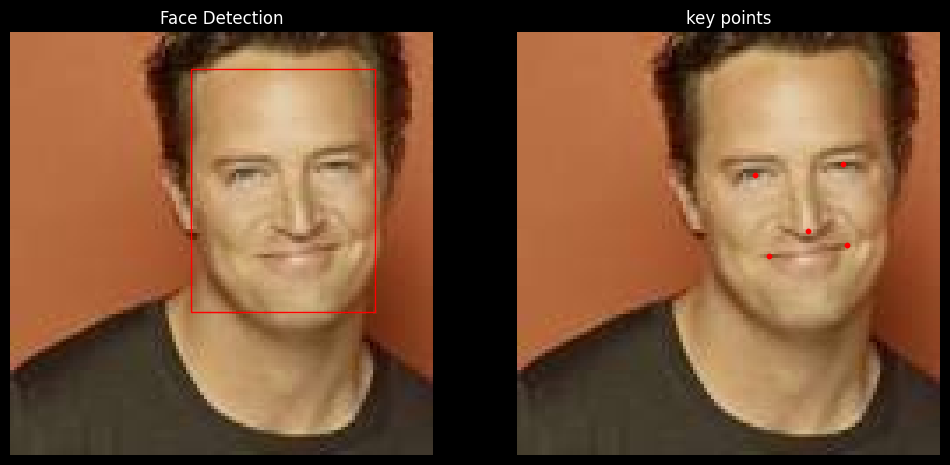

------------------------------------------------------------
The process has been started for detection of faces...
The box coordinates : [138, 354, 306, 338]
The confidence :  0.9993379712104797
The key points :  


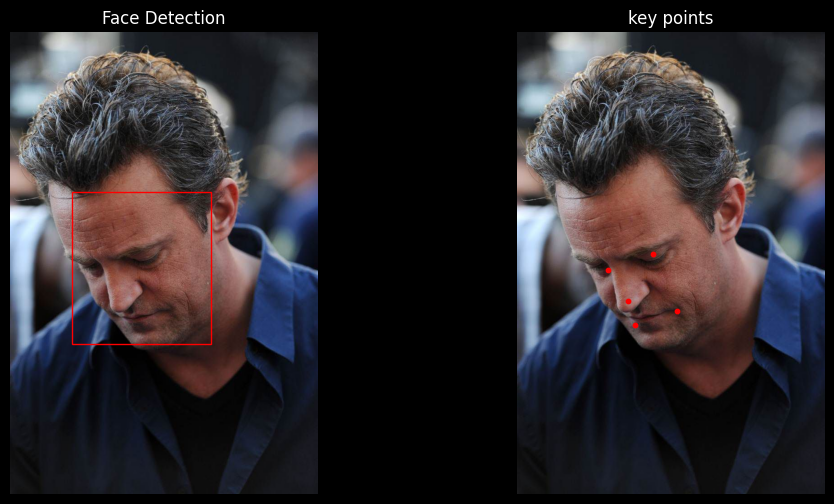

------------------------------------------------------------
The process has been started for detection of faces...
The box coordinates : [870, 546, 723, 916]
The confidence :  0.9991010427474976
The key points :  


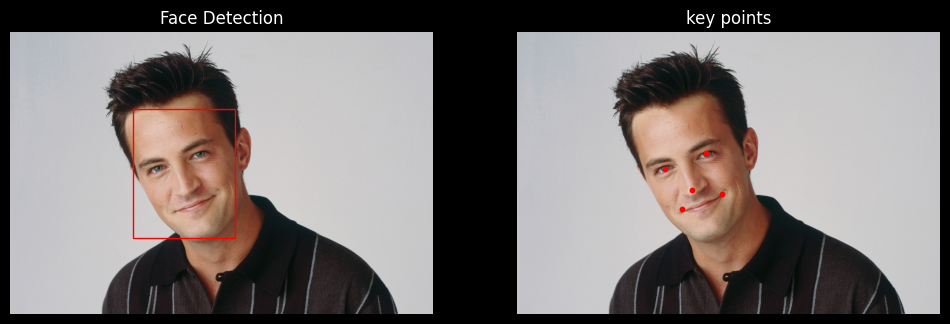

------------------------------------------------------------
The process has been started for detection of faces...
The box coordinates : [299, 63, 64, 85]
The confidence :  0.9973050355911255
The key points :  


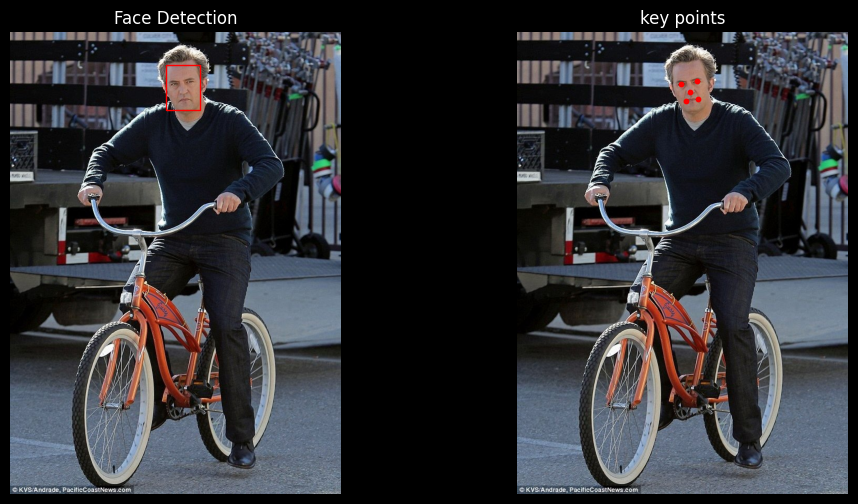

------------------------------------------------------------


In [156]:
for img in image_list:
  Face_Detection(image=img, color='red', size=10)

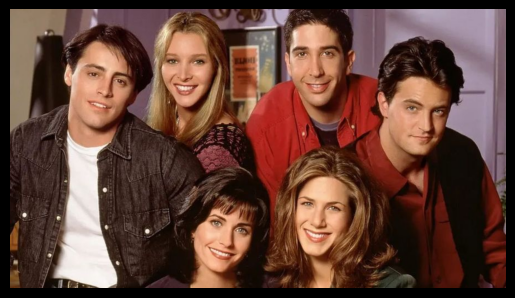

In [32]:
url = "https://images.lifestyleasia.com/wp-content/uploads/sites/2/2024/05/17191039/friends-1600x900.jpg?tr=w-900"
image = io.imread(url)
plt.imshow(image)
plt.axis('off')
plt.show()

The process has been started for detection of faces...
The box coordinates : [688, 123, 104, 138]
The confidence :  0.9994643926620483
The key points :  


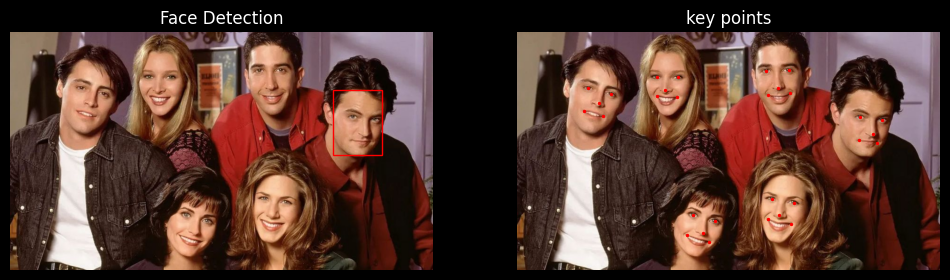

------------------------------------------------------------
The box coordinates : [114, 62, 108, 150]
The confidence :  0.9990501999855042
The key points :  


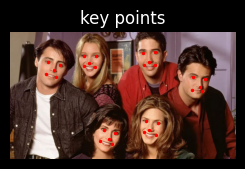

------------------------------------------------------------
The box coordinates : [340, 344, 101, 135]
The confidence :  0.998844563961029
The key points :  


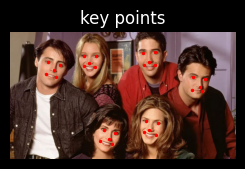

------------------------------------------------------------
The box coordinates : [518, 303, 98, 138]
The confidence :  0.9935279488563538
The key points :  


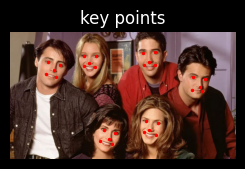

------------------------------------------------------------
The box coordinates : [274, 40, 94, 131]
The confidence :  0.9928907752037048
The key points :  


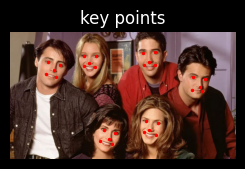

------------------------------------------------------------
The box coordinates : [505, 23, 100, 147]
The confidence :  0.9928786158561707
The key points :  


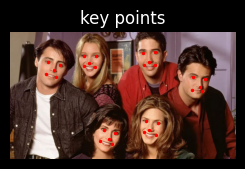

------------------------------------------------------------


In [35]:
Face_Detection(url=url, size=2)

In [157]:
#face verification with face net
def reading_img(img_path):
  img = cv2.imread(img_path)
  image = cv2.cvtColor(img, code = cv2.COLOR_BGR2RGB)
  return image

In [158]:
def Face_Detection_FaceNet(image, margin=0.2):
  model = MTCNN()
  detection = model.detect_faces(image)

  if detection:
    x, y, width, height = detection[0]['box']
    margin = margin
    #don't go to negative values
    x_min, y_min = max(x - int(margin * width), 0), max(y - int(margin * height), 0)
    # Ensure x_max and y_max are also integers
    x_max, y_max = min(x + width + int(margin * width), image.shape[1]), min(y + height + int(margin * height), image.shape[0])

    face_box = image[y_min:y_max, x_min:x_max] #to crop the photo

    image_with_face_detection = cv2.resize(face_box, (160, 160)) #resize the photo to 160x160

    # Ensure the image has 3 channels (for grayscale images, convert to RGB)
    if len(image_with_face_detection.shape) == 2:
        image_with_face_detection = cv2.cvtColor(image_with_face_detection, cv2.COLOR_GRAY2RGB)
    elif image_with_face_detection.shape[2] == 4:
        # If the image has an alpha channel, convert to RGB
        image_with_face_detection = cv2.cvtColor(image_with_face_detection, cv2.COLOR_RGBA2RGB)


    return image_with_face_detection
  else:
    # Return None or a specific indicator when no face is detected
    return None

In [159]:
#to turn a picture into a number code so that we can compare the
#numbers of the two photos and see if they match
def Embedding(fimage_with_face_detection): #our cropped face image
  model = FaceNet() #loads the facenet model
  # Pass the image as a list to model.embeddings
  Embedding_vector = model.embeddings([fimage_with_face_detection])[0] #to create the code with model.embedding
  return Embedding_vector

In [160]:
#to compare the embeddings
def Similarity_Measurement(embedding_vector1, embedding_vector2, threshold=0.4):
  Distance = cosine(embedding_vector1, embedding_vector2) #cosine function computes cosine distance
  #the smaller the cosine distance, the better
  scan_distance = Distance < threshold #checks whether the distance is lesser than threshold distance(0.4)
  #if lesser, then same person
  return scan_distance

In [161]:
#to compare the embeddings
def Similarity_Measurement(embedding_vector1, embedding_vector2, threshold=0.5):
  Distance = cosine(embedding_vector1, embedding_vector2) #cosine function computes cosine distance
  #the smaller the cosine distance, the better
  scan_distance = Distance < threshold #checks whether the distance is lesser than threshold distance(0.7)
  #if lesser, then same person
  return scan_distance

In [162]:
def Comparison_Faces(img1, img2):
  image1 = reading_img(img1)
  image2 = reading_img(img2)

  face1 = Face_Detection_FaceNet(image = image1, margin = 0.2)
  face2 = Face_Detection_FaceNet(image = image2, margin = 0.2)

  if face1 is not None and face2 is not None:
    plt.style.use('dark_background')
    plt.figure(figsize=(12, 6))

    plt.suptitle('Faces Comparison')

    plt.subplot(1, 2, 1)
    plt.imshow(face1)
    plt.title(f'Image 1: \nThe shape{face1.shape}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(face2)
    plt.title(f'Image 2: \nThe shape{face2.shape}')
    plt.axis('off')

    plt.show()

    embed1 = Embedding(face1)
    embed2 = Embedding(face2)

    return Similarity_Measurement(embed1, embed2)
  else:
    return None


In [163]:
def Showing(image_path1, image_path2):
  print(f'{Color.BOLD}The process has been started for faces comparison...')

  checking = Comparison_Faces(img1 = image_path1, img2 = image_path2)

  if checking:
    print(f'Result: {Color.GREEN} The faces are the same person {Color.END}')
  else:
    print(f'Result: {Color.RED} The faces are not the same person {Color.END}')

  print('--'*40)

The process has been started for faces comparison...


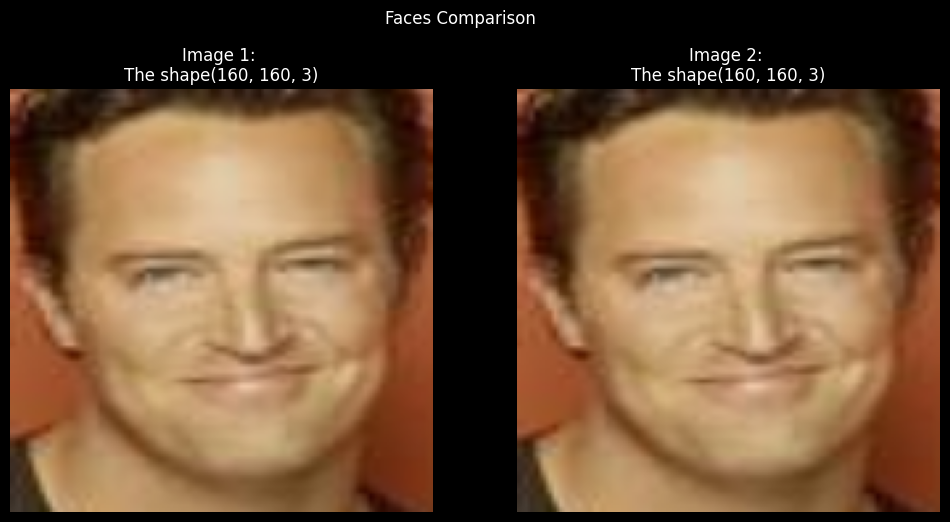

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result:  The faces are the same person 
--------------------------------------------------------------------------------
The process has been started for faces comparison...


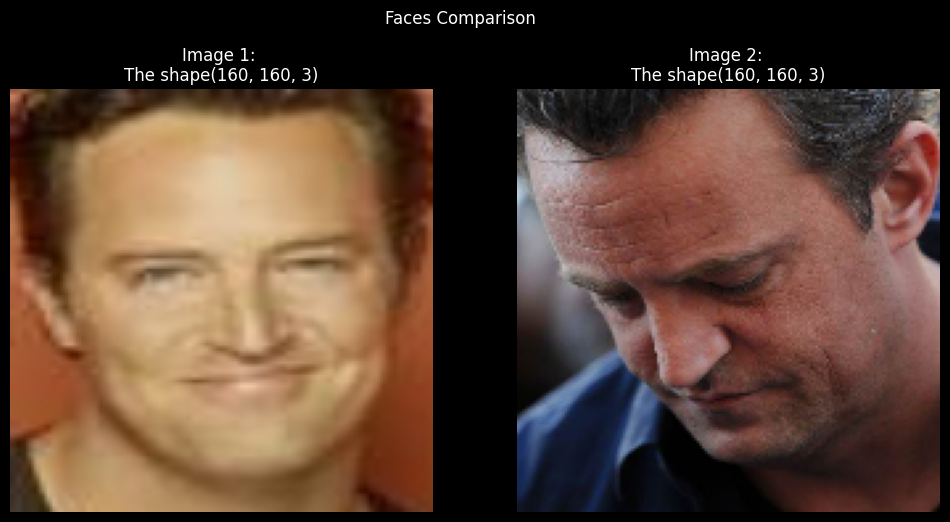

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Result:  The faces are the same person 
--------------------------------------------------------------------------------
The process has been started for faces comparison...


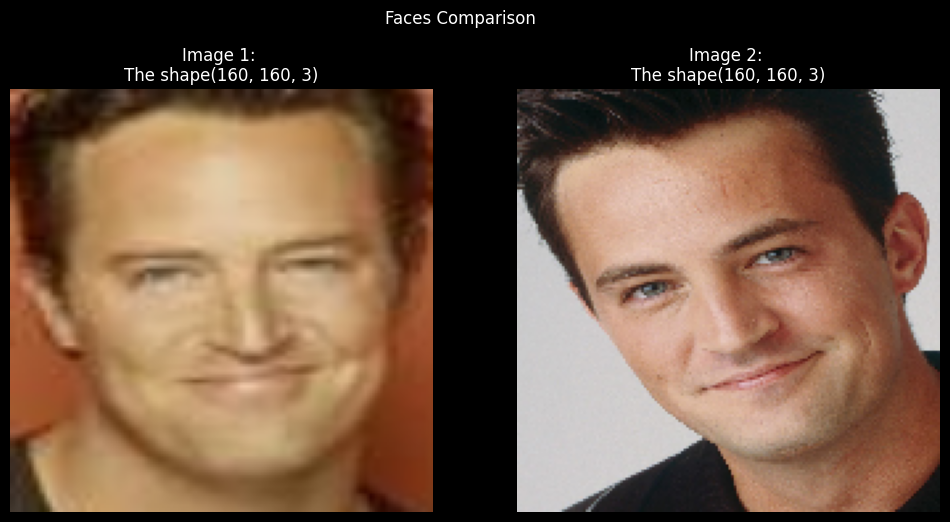

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result:  The faces are the same person 
--------------------------------------------------------------------------------
The process has been started for faces comparison...


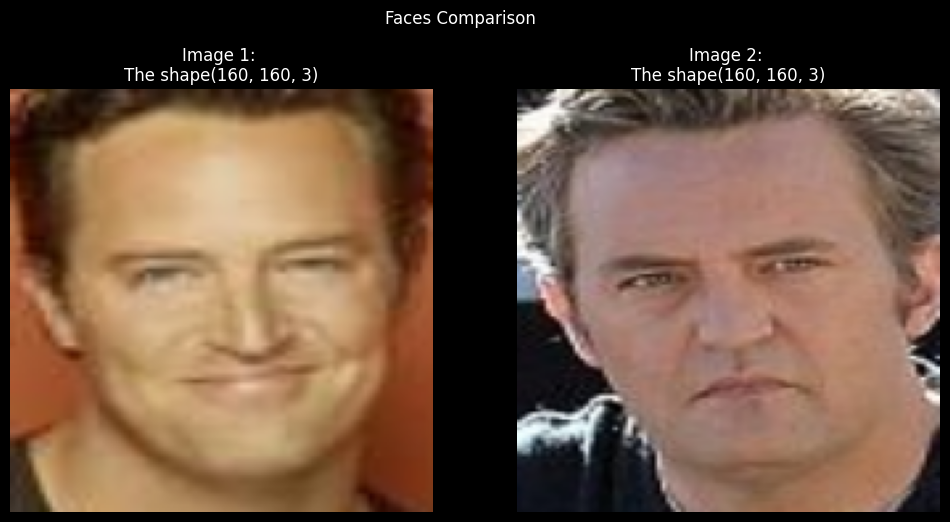

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result:  The faces are the same person 
--------------------------------------------------------------------------------


In [164]:
for img in image_list:
  Showing(image_list[0], img)